In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pT > 0.5; 2° < thetaAbs < 10°
# pairsCuts: None

Y_OS = [57516.0, 56283.0, 53697.0, 52511.0, 50745.0, 48297.0, 47021.0, 45052.0, 43335.0, 41748.0, 
        40285.0, 38490.0, 36829.0, 35355.0, 33737.0, 32063.0, 30435.0, 29253.0, 28253.0, 27012.0, 
        25666.0, 24694.0, 23375.0, 22226.0, 21548.0, 20542.0, 19718.0, 18826.0, 18131.0, 17409.0, 
        16471.0, 15964.0, 15480.0, 14811.0, 14380.0, 14181.0, 13807.0, 13913.0, 14263.0, 14918.0, 
        17208.0, 19977.0, 25373.0, 33833.0, 43239.0, 48824.0, 45460.0, 34364.0, 21743.0, 13390.0, 
        9230.0, 7352.0, 6551.0, 5886.0, 5517.0, 5175.0, 5082.0, 4836.0, 4759.0, 4721.0, 4652.0, 
        4765.0, 4574.0, 4388.0, 4163.0, 3663.0, 3357.0, 3106.0, 3068.0, 2949.0, 2778.0, 2694.0, 
        2600.0, 2585.0, 2492.0, 2378.0, 2379.0, 2201.0, 2154.0, 2078.0, 2013.0, 1973.0, 1903.0, 
        1794.0, 1797.0, 1714.0, 1627.0, 1607.0, 1500.0, 1510.0, 1449.0, 1460.0, 1385.0, 1363.0, 
        1314.0, 1282.0, 1273.0, 1192.0, 1215.0, 1116.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = len(X), start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [10869.0, 10591.0, 10211.0, 9998.0, 9703.0, 9245.0, 9111.0, 8664.0, 8189.0, 7899.0, 
        7761.0, 7378.0, 7052.0, 6784.0, 6517.0, 6292.0, 6039.0, 5899.0, 5624.0, 5410.0, 
        5243.0, 5104.0, 4869.0, 4708.0, 4459.0, 4368.0, 4142.0, 4053.0, 4091.0, 3793.0, 
        3677.0, 3519.0, 3397.0, 3426.0, 3314.0, 3224.0, 3004.0, 2889.0, 2861.0, 2741.0, 
        2673.0, 2585.0, 2531.0, 2369.0, 2447.0, 2271.0, 2170.0, 2174.0, 2034.0, 2023.0, 
        1889.0, 1967.0, 1872.0, 1798.0, 1760.0, 1707.0, 1621.0, 1554.0, 1540.0, 1444.0, 
        1493.0, 1372.0, 1334.0, 1380.0, 1307.0, 1122.0, 1249.0, 1205.0, 1210.0, 1103.0, 
        1118.0, 1009.0, 1070.0, 1000.0, 984.0, 984.0, 898.0, 859.0, 847.0, 852.0, 815.0,
        753.0, 827.0, 745.0, 764.0, 722.0, 673.0, 745.0, 711.0, 683.0, 649.0, 659.0, 588.0, 
        618.0, 581.0, 582.0, 558.0, 550.0, 554.0, 501.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = len(X), start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [88.0, 88.0, 118.0, 110.0, 141.0, 160.0, 148.0, 187.0, 220.0, 218.0, 236.0, 251.0, 266.0, 
          320.0, 387.0, 406.0, 437.0, 520.0, 531.0, 598.0, 642.0, 690.0, 802.0, 820.0, 897.0, 997.0, 
          1130.0, 1340.0, 1506.0, 1631.0, 1810.0, 2085.0, 2573.0, 2971.0, 3699.0, 4541.0, 5893.0, 
          7493.0, 10141.0, 13606.0, 18994.0, 28297.0, 43446.0, 68764.0, 104033.0, 132293.0, 127464.0, 
          85569.0, 40235.0, 14867.0, 5257.0, 2174.0, 1253.0, 733.0, 460.0, 315.0, 272.0, 167.0, 156.0, 
          115.0, 88.0, 83.0, 76.0, 54.0, 55.0, 56.0, 36.0, 26.0, 29.0, 28.0, 28.0, 19.0, 22.0, 14.0, 
          12.0, 10.0, 11.0, 12.0, 9.0, 12.0, 10.0, 6.0, 4.0, 5.0, 5.0, 2.0, 4.0, 2.0, 4.0, 2.0, 6.0, 
          4.0, 7.0, 3.0, 5.0, 1.0, 1.0, 6.0, 1.0, 2.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = len(X), start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [25.0, 31.0, 32.0, 24.0, 27.0, 35.0, 18.0, 49.0, 43.0, 50.0, 49.0, 60.0, 46.0, 65.0, 74.0, 
         86.0, 89.0, 98.0, 116.0, 103.0, 119.0, 125.0, 127.0, 153.0, 167.0, 157.0, 178.0, 200.0, 213.0, 
         254.0, 246.0, 274.0, 298.0, 324.0, 349.0, 380.0, 446.0, 406.0, 429.0, 552.0, 560.0, 611.0, 672.0, 
         717.0, 779.0, 881.0, 1000.0, 1207.0, 1396.0, 1637.0, 2027.0, 2392.0, 3019.0, 3731.0, 4654.0, 
         5968.0, 7744.0, 10710.0, 15701.0, 23906.0, 36490.0, 53436.0, 65812.0, 62359.0, 42654.0, 
         20433.0, 7793.0, 2789.0, 1178.0, 607.0, 358.0, 249.0, 169.0, 128.0, 93.0, 75.0, 72.0, 37.0, 
         43.0, 38.0, 32.0, 27.0, 15.0, 21.0, 20.0, 18.0, 17.0, 11.0, 16.0, 17.0, 5.0, 7.0, 11.0, 10.0, 
         7.0, 7.0, 7.0, 4.0, 7.0, 3.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = len(X), start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [113.0, 119.0, 150.0, 134.0, 168.0, 195.0, 166.0, 236.0, 263.0, 268.0, 285.0, 311.0, 312.0, 385.0, 
        461.0, 492.0, 526.0, 618.0, 647.0, 701.0, 761.0, 815.0, 929.0, 973.0, 1064.0, 1154.0, 1308.0, 
        1540.0, 1719.0, 1885.0, 2056.0, 2359.0, 2871.0, 3295.0, 4048.0, 4921.0, 6339.0, 7899.0, 10570.0, 
        14158.0, 19554.0, 28908.0, 44118.0, 69481.0, 104812.0, 133174.0, 128464.0, 86776.0, 41631.0, 
        16504.0, 7284.0, 4566.0, 4272.0, 4464.0, 5114.0, 6283.0, 8016.0, 10877.0, 15857.0, 24021.0, 
        36578.0, 53519.0, 65888.0, 62413.0, 42709.0, 20489.0, 7829.0, 2815.0, 1207.0, 635.0, 386.0, 
        268.0, 191.0, 142.0, 105.0, 85.0, 83.0, 49.0, 52.0, 50.0, 42.0, 33.0, 19.0, 26.0, 25.0, 20.0, 
        21.0, 13.0, 20.0, 19.0, 11.0, 11.0, 18.0, 13.0, 12.0, 8.0, 8.0, 10.0, 8.0, 5.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = len(X), start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 1137225.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 4.5)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

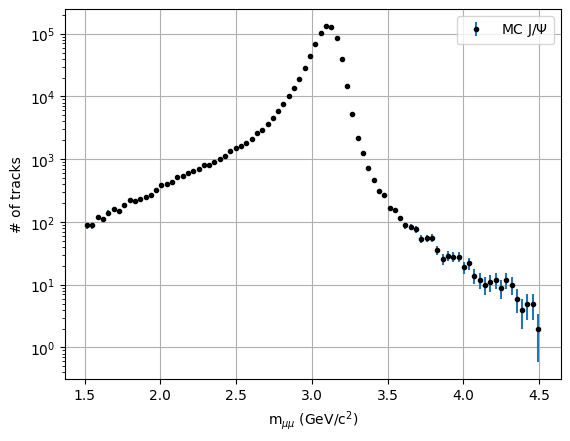

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [136228.47478260414, 3.1003637093666954, 0.0630451478315636, 0.994124556618519, 3.033510038864661, 2.2403688130949093, 2.666700803114668]
pcov: 
 [[ 7.75076908e+05  1.11133438e-01 -2.38700575e-01 -1.30830783e+00
  -5.12425017e-01 -6.23591949e+00  1.30365069e+01]
 [ 1.11133438e-01  2.52336821e-07 -1.38777016e-07 -4.84779758e-06
   1.40065630e-05 -2.14244359e-06  1.76193651e-06]
 [-2.38700575e-01 -1.38777016e-07  1.98437350e-07  4.18510262e-06
  -9.30538394e-06  6.75473501e-06 -1.26877804e-05]
 [-1.30830783e+00 -4.84779758e-06  4.18510262e-06  2.35579158e-04
  -9.09119203e-04  1.28801658e-04 -2.10638035e-04]
 [-5.12425017e-01  1.40065630e-05 -9.30538394e-06 -9.09119203e-04
   4.96409217e-03 -2.46341966e-04  3.43638851e-04]
 [-6.23591949e+00 -2.14244359e-06  6.75473501e-06  1.28801658e-04
  -2.46341966e-04  1.83366601e-03 -6.00884045e-03]
 [ 1.30365069e+01  1.76193651e-06 -1.26877804e-05 -2.10638035e-04
   3.43638851e-04 -6.00884045e-03  2.74871011e-02]]
residual: 
 {'nfev': 5, 'f

fit error : 880.3845425056454


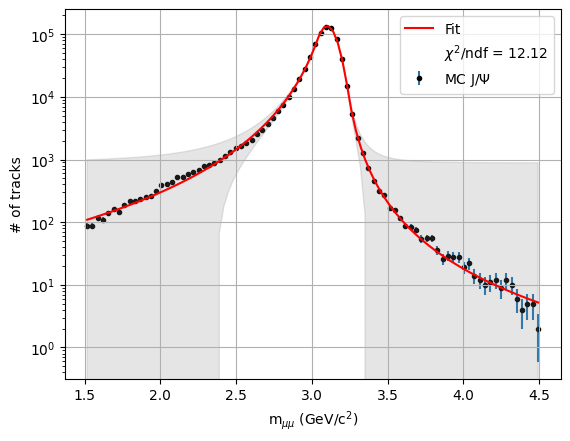

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_7339/2642993752.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))


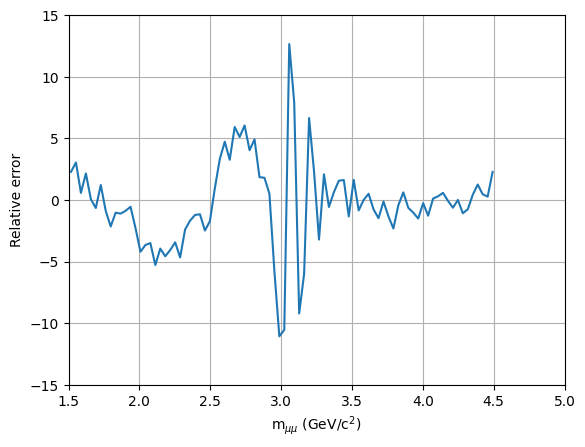

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

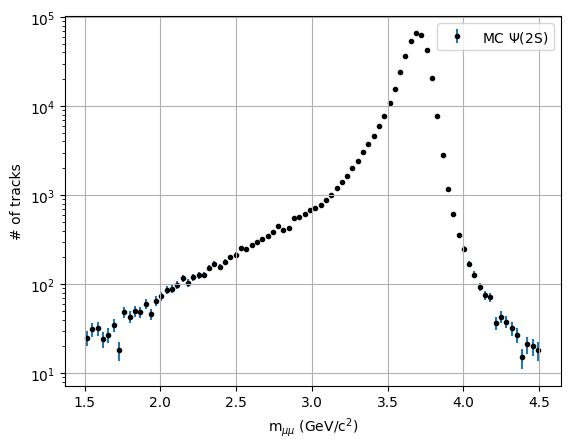

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [67465.16226775442, 3.6932589114353798, 0.06508300982936498, 0.960248515746732, 2.8500538827960513, 2.2680123554089135, 2.6419128000749734]
pcov: 
 [[ 2.30569623e+05  7.08801491e-02 -1.50781926e-01 -6.75083262e-01
  -4.78082115e-01 -4.63584796e+00  1.20869507e+01]
 [ 7.08801491e-02  3.35953763e-07 -1.87748320e-07 -5.60961621e-06
   1.33241920e-05 -3.24219451e-06  4.17139470e-06]
 [-1.50781926e-01 -1.87748320e-07  2.66515335e-07  4.88657696e-06
  -8.74814379e-06  1.03425760e-05 -2.46301226e-05]
 [-6.75083262e-01 -5.60961621e-06  4.88657696e-06  2.33331006e-04
  -7.46008868e-04  1.70217765e-04 -3.62284232e-04]
 [-4.78082115e-01  1.33241920e-05 -8.74814379e-06 -7.46008868e-04
   3.50109728e-03 -2.54978785e-04  4.69445217e-04]
 [-4.63584796e+00 -3.24219451e-06  1.03425760e-05  1.70217765e-04
  -2.54978785e-04  3.00614312e-03 -1.15567457e-02]
 [ 1.20869507e+01  4.17139470e-06 -2.46301226e-05 -3.62284232e-04
   4.69445217e-04 -1.15567457e-02  5.81912360e-02]]
residual: 
 {'nfev': 5, 

fit error : 480.17672555395416


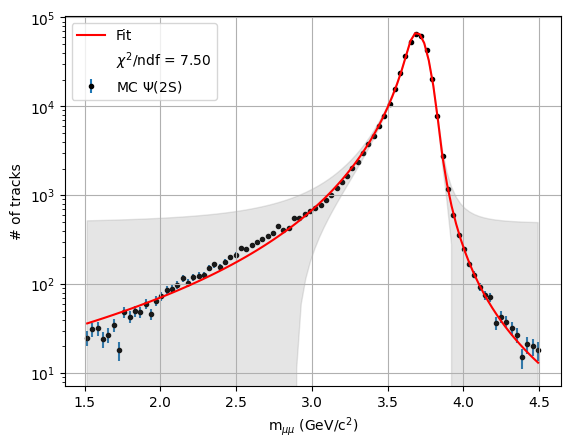

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_7339/3080860769.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))


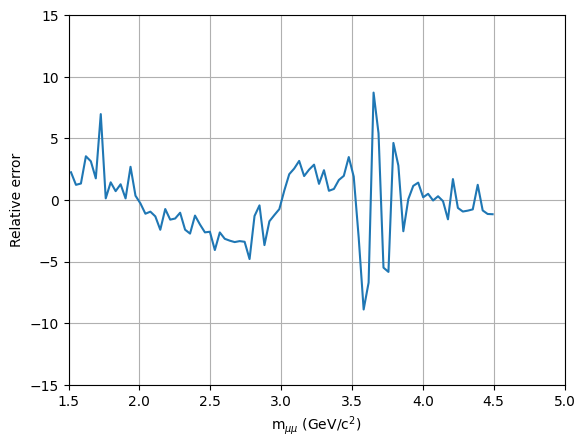

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

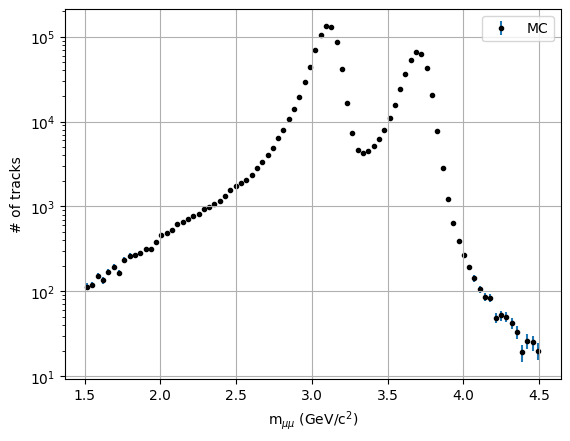

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [136115.0347337915, 3.100212367669765, 0.0631177786922707, 67472.11098867666, 3.693247264105454, 0.06510310899329819]
pcov: 
 [[ 9.43628124e+05  8.67663100e-02 -2.38678687e-01 -3.36650884e+03
  -8.24888224e-03  1.05925780e-02]
 [ 8.67663100e-02  1.77645242e-07 -4.06586582e-08  1.58948118e-04
   2.03635822e-09 -1.54359330e-09]
 [-2.38678687e-01 -4.06586582e-08  1.17423848e-07  6.15088857e-03
   1.21275428e-08 -1.68764178e-08]
 [-3.36650884e+03  1.58948118e-04  6.15088857e-03  4.48409417e+05
   1.04827878e-01 -2.43913662e-01]
 [-8.24888224e-03  2.03635822e-09  1.21275428e-08  1.04827878e-01
   3.87258214e-07 -1.19662861e-07]
 [ 1.05925780e-02 -1.54359330e-09 -1.68764178e-08 -2.43913662e-01
  -1.19662861e-07  2.61552046e-07]]
residual: 
 {'nfev': 4, 'fvec': array([ 3.11080072e+00,  3.28005068e+00,  1.16072984e+00,  3.49437844e+00,
        1.35571853e+00,  1.91999196e-01,  3.48422951e+00, -6.94407292e-01,
       -1.34709521e+00, -5.78639326e-01, -4.35316245e-01, -6.94358758e-01,
  

fit error : 1179.8464054940814


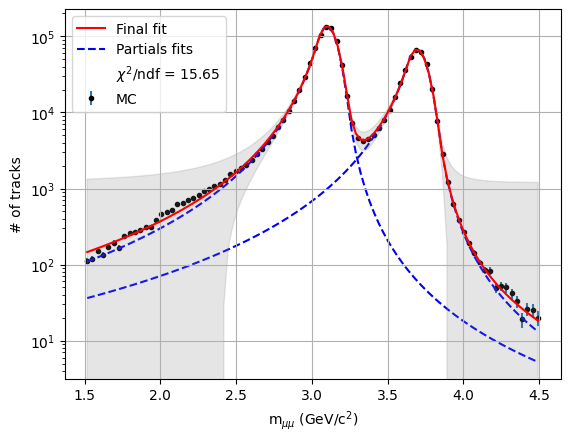

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_7339/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


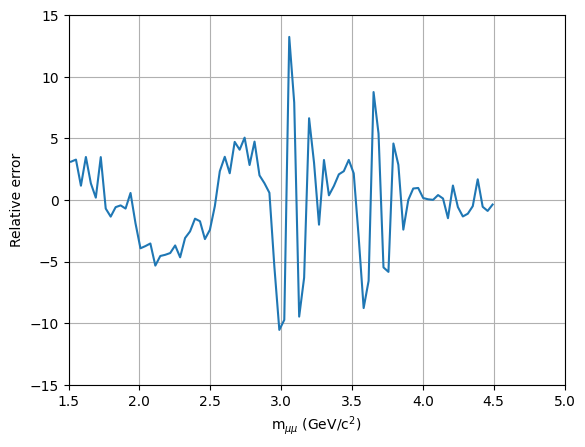

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

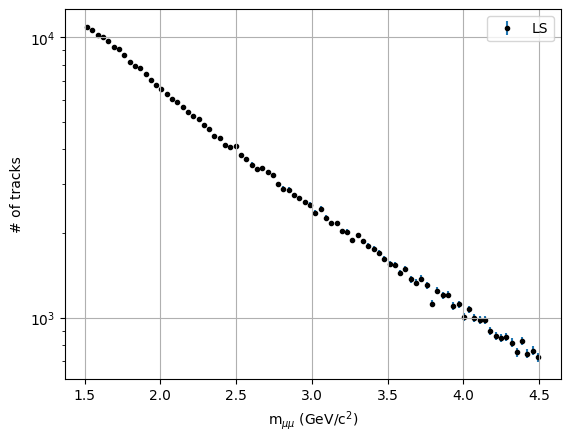

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [9.338532153610128, 8.285410402491173, 7.415931126594195, 7.128492204231403, 6.129280310580093]
pcov: 
 [[ 3.66111961e-05 -5.98535917e-06  7.29376310e-06 -3.78257255e-06
   1.44712968e-04]
 [-5.98535917e-06  1.12763610e-05  2.84387957e-06 -3.44190910e-06
   6.22487998e-05]
 [ 7.29376310e-06  2.84387957e-06  2.66561807e-05  2.45933896e-05
  -9.53548762e-05]
 [-3.78257255e-06 -3.44190910e-06  2.45933896e-05  5.68043486e-05
  -5.31834096e-04]
 [ 1.44712968e-04  6.22487998e-05 -9.53548762e-05 -5.31834096e-04
   1.13809946e-02]]
residual: 
 {'nfev': 11, 'fvec': array([ 2.67180455,  1.26490768,  1.00653287, -0.76655677, -1.59039917,
       -0.60378167, -2.81317778, -1.63003918,  0.07412128, -0.07679583,
       -1.81501184, -0.65255843,  0.02604543,  0.16175811,  0.41970611,
        0.28253112,  0.62382661, -0.38185707,  0.48800939,  0.67816084,
        0.33369453, -0.30653355,  0.50686855,  0.3738814 ,  1.65717141,
        0.66724608,  1.8443905 ,  0.9771501 , -1.80781834,  0.7785733

fit error : 0.10729558573909626


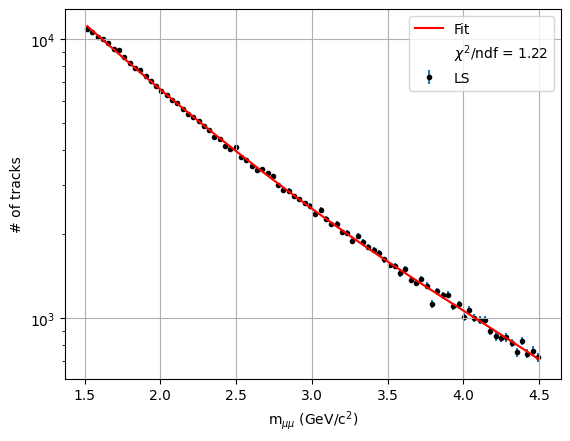

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

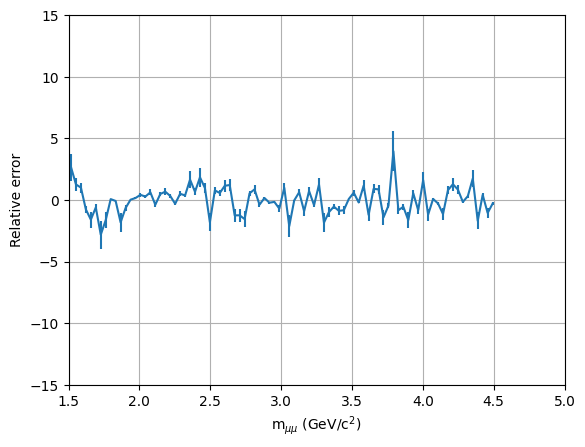

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

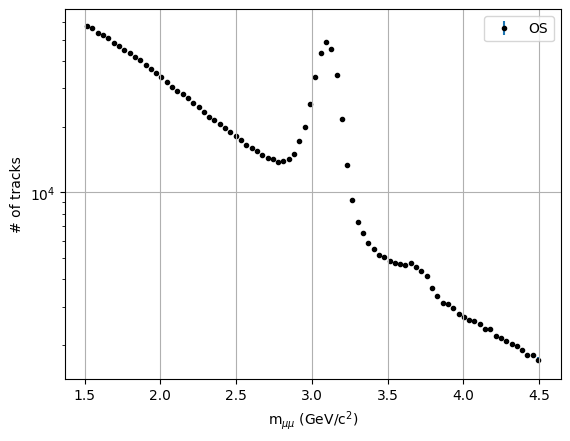

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [42353.43110050431, 3.097115079608306, 0.06934966261471996, 833.9629181037807, 3.6826878325022516, 0.07159131081115243, 10.98743582645986, 9.764690773424123, 8.509468269296418, 8.126878062251997, 6.852782561676118]
pcov: 
 [[ 1.25140544e+05  3.27285250e-02 -1.25718107e-01  5.12785584e+02
  -8.31695400e-02  1.48585705e-01 -7.86078788e-02 -5.49157355e-02
  -2.54607981e-01 -1.40314446e-01 -4.89820881e-01]
 [ 3.27285250e-02  3.65587925e-07 -1.33597102e-07 -6.95921802e-04
   3.03049349e-07 -3.67445078e-07  1.58596102e-07  5.59957040e-07
   8.91829005e-07  9.56040814e-08  7.10130414e-06]
 [-1.25718107e-01 -1.33597102e-07  4.24213734e-07  6.81123533e-03
  -6.29220845e-07  1.12295088e-06 -6.40151072e-07 -1.33265936e-06
  -3.28305612e-06 -1.66408154e-06 -7.72310345e-06]
 [ 5.12785584e+02 -6.95921802e-04  6.81123533e-03  1.43795899e+04
   1.18410985e-01 -6.07363079e-01 -2.57633950e-02 -3.17255717e-02
  -3.88944575e-01 -5.42644626e-01  4.05213677e+00]
 [-8.31695400e-02  3.03049349e-07 -6.

fit error : 373.5239792453002


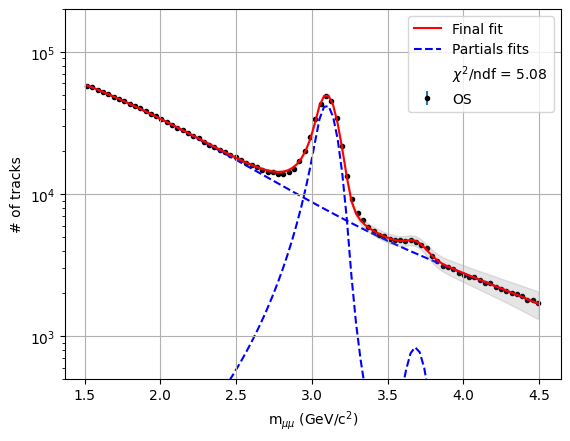

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(500, 200000)
plt.grid(True)

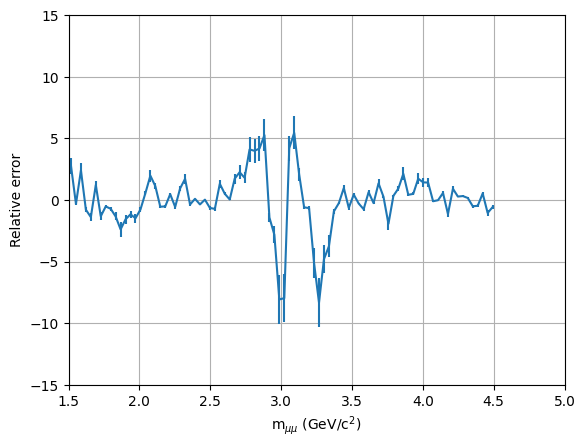

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
# Derivatives

def intervals(rel, alphaL, alphaR):
    I1 = rel < -1 * alphaL
    I2 = (rel >= -1 * alphaL) * (rel <= alphaR)
    I3 = rel > alphaR
    return I1, I2, I3


def dcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = ((nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)[I1]
    res[I2] = (np.exp(-(-mu + x)**2/(2*sig**2)))                                                                             [I2]
    res[I3] = ((nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR)[I3]
    return res

def dcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(sig*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (-N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2)                                                                                                                   ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(sig*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def dcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*(-mu + x)*np.exp(-np.abs(alphaL)**2/2)/(sig**2*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3                                                                                                                                     ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*(-mu + x)*np.exp(-np.abs(alphaR)**2/2)/(sig**2*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def IdcbdN(x, *args):
    return quad(dcbdN, start, stop, args=args)[0]

def Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdmu, start, stop, args=args)[0]

def Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdsig, start, stop, args=args)[0]

def sig2cb(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    return IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0,0]
    +Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1,1]
    +Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2,2]
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 1])
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 2])
    +2*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[1, 2])
    
N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = np.sqrt(sig2cb(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])) / ((stop - start)/bins)
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi)

N_JPsi =  254658.97906163745  +/-  2127.0094252209865


/tmp/ipykernel_7339/702439652.py:16: RuntimeWarning: invalid value encountered in power
  res[I1] = ((nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)[I1]
/tmp/ipykernel_7339/702439652.py:18: RuntimeWarning: invalid value encountered in power
  res[I3] = ((nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR)[I3]
